In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.set()
%matplotlib.inline
pd.options.display.max_columns = 40

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
data = pd.read_csv('student-mat.csv', sep = ';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
columns_to_encoder = ['school','sex','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian', 'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

for colum in columns_to_encoder:
    encoder = LabelEncoder()
    data[colum] = encoder.fit_transform(data[colum])
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,2.169620,2.281013,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
def aproved(value):
    if value >= 10:
        return 1
    return 0
data['approved'] = data['G3'].apply(aproved)

In [6]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,approved
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,0
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,1
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,1


In [7]:
data.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,approved
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,2.169620,2.281013,...,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,0.670886
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,...,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,0.470487
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,1.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,1.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000


In [8]:
data['approved'].value_counts()

1    265
0    130
Name: approved, dtype: int64

In [9]:
worst_accuracy = data['approved'].value_counts()[1] / data['approved'].value_counts().sum()
worst_accuracy # this is the worst accuracy because all predictions will be approved

0.6708860759493671

In [10]:
data.drop(['G1','G2','G3'], axis = 1, inplace = True)

In [11]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,approved
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,0
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,0
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,10,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,2,1
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,4,1


[0.01418482 0.02685111 0.04766817 0.02444236 0.02363409 0.0129059
 0.04461064 0.03749932 0.03435615 0.03407733 0.03686333 0.03202486
 0.0258322  0.04019437 0.0822038  0.02687095 0.02478978 0.02636306
 0.02991924 0.02120032 0.01850145 0.0200903  0.02585207 0.03738324
 0.03810825 0.05113047 0.02738178 0.03688912 0.0402038  0.0579677 ]


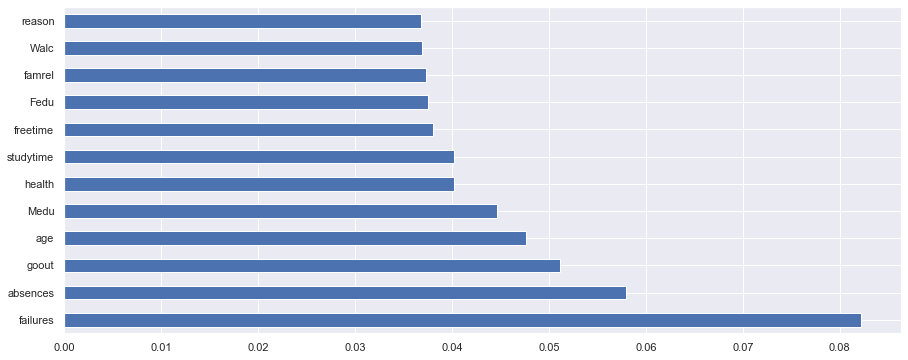

In [12]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = data.iloc[:, :-1]
y = data.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

# We will select only 4 features: failures, absences, gout and age

In [13]:
x = data[["failures", 'absences', 'goout', "age"]]
x.head()

,failures,absences,goout,age
0,0,6,4,18
1,0,4,3,17
2,3,10,2,15
3,0,2,2,15
4,0,4,2,16


In [14]:
x.describe()

,failures,absences,goout,age
count,395.000000,395.000000,395.000000,395.000000
mean,0.334177,5.708861,3.108861,16.696203
std,0.743651,8.003096,1.113278,1.276043
min,0.000000,0.000000,1.000000,15.000000
25%,0.000000,0.000000,2.000000,16.000000
50%,0.000000,4.000000,3.000000,17.000000
75%,0.000000,8.000000,4.000000,18.000000
max,3.000000,75.000000,5.000000,22.000000


In [15]:
failures_dummies = pd.get_dummies(x['failures'])
x = x.join(failures_dummies)
x.drop('failures', axis = 1, inplace = True)
x.head()

,absences,goout,age,0,1,2,3
0,6,4,18,1,0,0,0
1,4,3,17,1,0,0,0
2,10,2,15,0,0,0,1
3,2,2,15,1,0,0,0
4,4,2,16,1,0,0,0


In [16]:
goout_dummies = pd.get_dummies(x['goout'])
goout_dummies.columns = [4,5,6,7,8]
x = x.join(goout_dummies)
x.drop('goout', axis = 1, inplace = True)
x.head()

,absences,age,0,1,2,3,4,5,6,7,8
0,6,18,1,0,0,0,0,0,0,1,0
1,4,17,1,0,0,0,0,0,1,0,0
2,10,15,0,0,0,1,0,1,0,0,0
3,2,15,1,0,0,0,0,1,0,0,0
4,4,16,1,0,0,0,0,1,0,0,0


In [17]:
scaler = StandardScaler()
x.iloc[:,:2] = scaler.fit_transform(x.iloc[:, :2])
x.head()

,absences,age,0,1,2,3,4,5,6,7,8
0,0.036424,1.023046,1,0,0,0,0,0,0,1,0
1,-0.213796,0.238380,1,0,0,0,0,0,1,0,0
2,0.536865,-1.330954,0,0,0,1,0,1,0,0,0
3,-0.464016,-1.330954,1,0,0,0,0,1,0,0,0
4,-0.213796,-0.546287,1,0,0,0,0,1,0,0,0


In [18]:
data_processed = x.join(y)
data_processed.head()

,absences,age,0,1,2,3,4,5,6,7,8,approved
0,0.036424,1.023046,1,0,0,0,0,0,0,1,0,0
1,-0.213796,0.238380,1,0,0,0,0,0,1,0,0,0
2,0.536865,-1.330954,0,0,0,1,0,1,0,0,0,1
3,-0.464016,-1.330954,1,0,0,0,0,1,0,0,0,1
4,-0.213796,-0.546287,1,0,0,0,0,1,0,0,0,1


In [19]:
data_processed.to_csv('data_processed.csv', index = False)